In [1]:
import pandas as pd
import utils_comp as utils
import utils_max_flow
import utils_centrality
import pickle

In [2]:
# Dataset; 'iggin' or 'iggielgn'
dataset = 'iggin'

# S-t-flow; 's-t-degree' or 's-t-type'
s_t_flow = 's-t-degree'

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [3]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/wfcr_edge_removal_df.pkl')

In [4]:
""" 
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed' 
"""

" \nwith open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:\n    G_simple_directed = pickle.load(f)\n    G_simple_directed.name = 'G_simple_directed' \n"

In [5]:
with open('graph_objects/G_simple_directed.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

# Direct comparison of index 

### Node

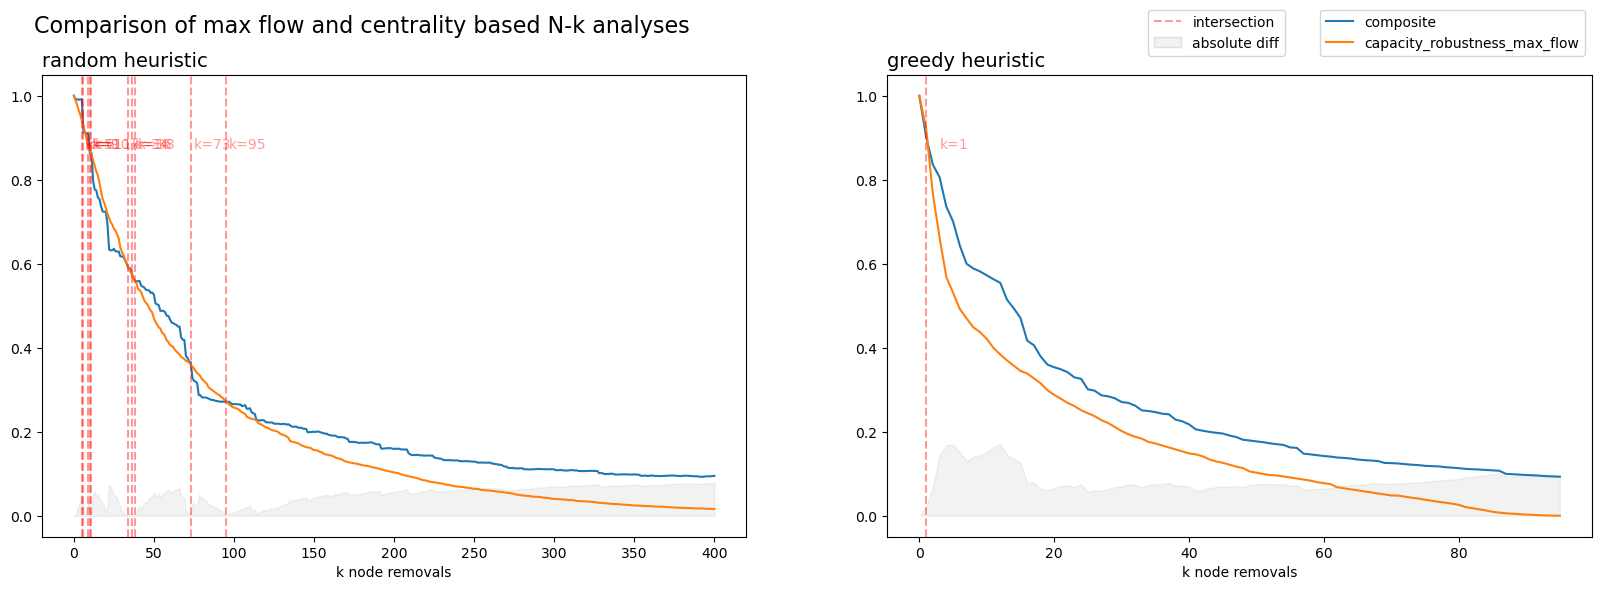

	AUC for composite: 96.1  							          AUC for capacity_robustness_max_flow: 78.5
	composite: [max ROC: 0.06990, avg ROC: 0.06989]    					  capacity_robustness_max_flow: [max ROC: 0.06909, avg ROC: 0.06908]

	AUC for composite: 24.98  							          AUC for capacity_robustness_max_flow: 16.95
	composite: [max ROC: 1.00927, avg ROC: 1.00776]    					  capacity_robustness_max_flow: [max ROC: 0.98839, avg ROC: 0.98692]



In [6]:
fig = utils.plot_max_flow_and_centrality_comparison([centrality_random_node_removal_df, centrality_greedy_node_removal_df], [max_flow_random_node_removal_df, max_flow_greedy_node_removal_df], 'composite', 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/direct_node_comparison.png')

In [7]:
utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

20 common entity removals
95 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 916.0
Variance of index differences for random (averaged) node removal: 9852.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
1,INET_N_72,9,9,0
12,INET_N_1219,4,4,0
17,INET_N_314,14,15,1
0,INET_N_1545,5,3,2
7,INET_N_272,23,16,7
18,INET_N_999,62,72,10
8,N_kremenchuk,21,31,10
15,INET_N_966,30,18,12
9,INET_N_519,31,45,14
4,NO_N_32,16,34,18


### Edge

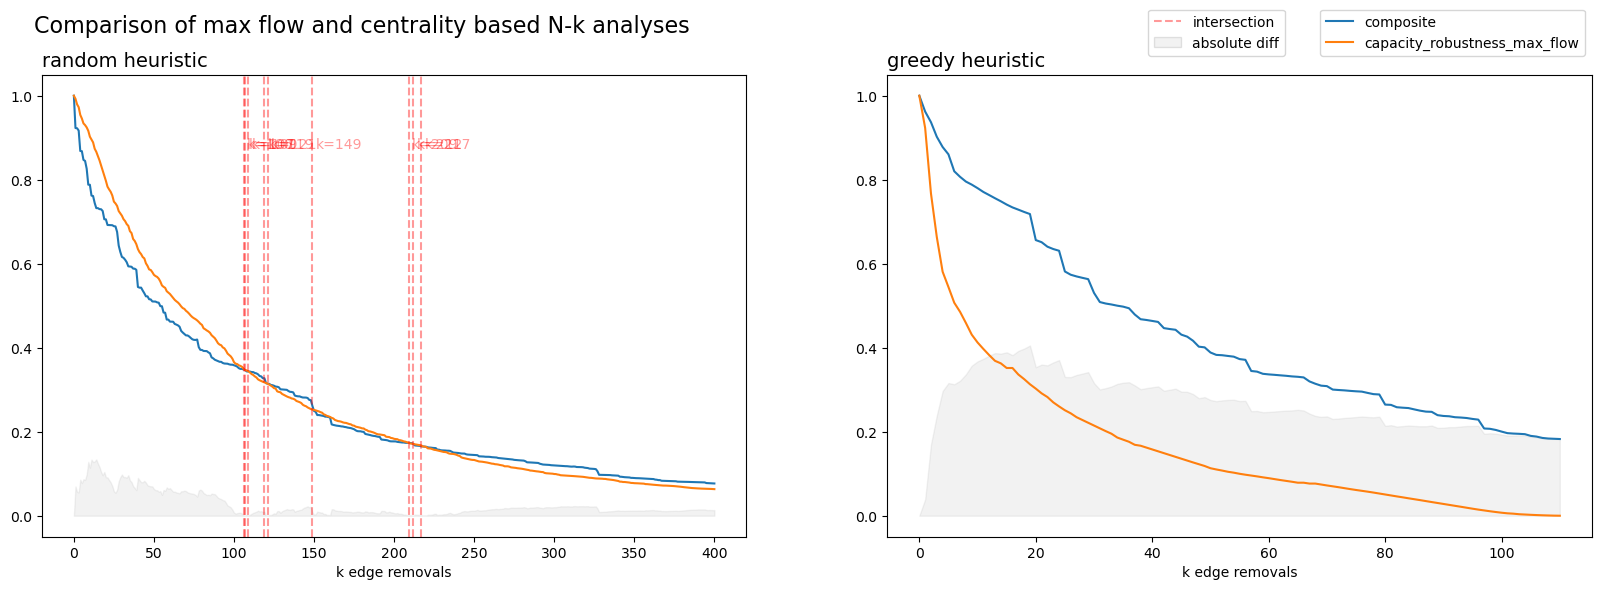

	AUC for composite: 105.11  							          AUC for capacity_robustness_max_flow: 109.5
	composite: [max ROC: 0.04629, avg ROC: 0.04629]    					  capacity_robustness_max_flow: [max ROC: 0.05345, avg ROC: 0.05344]

	AUC for composite: 47.79  							          AUC for capacity_robustness_max_flow: 18.36
	composite: [max ROC: 0.36145, avg ROC: 0.36138]    					  capacity_robustness_max_flow: [max ROC: 0.76229, avg ROC: 0.76137]



In [8]:
fig = utils.plot_max_flow_and_centrality_comparison([centrality_random_edge_removal_df, centrality_greedy_edge_removal_df], [max_flow_random_edge_removal_df, max_flow_greedy_edge_removal_df], 'composite', 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/direct_edge_comparison.png')

In [9]:
utils.common_entities(centrality_greedy_edge_removal_df, max_flow_greedy_edge_removal_df)

19 common entity removals
110 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 1452.0
Variance of index differences for random (averaged) edge removal: 9339.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
1,"(INET_N_1219, INET_N_870)",3,4,1
3,"(INET_N_1551, INET_N_72)",21,20,1
5,"(INET_N_1620, INET_N_1637)",1,2,1
14,"(NO_N_4, NO_N_5)",5,1,4
0,"(INET_N_1389, INET_N_1573)",17,10,7
2,"(INET_N_295, INET_N_992)",14,7,7
16,"(INET_N_301, INET_N_1630)",22,34,12
9,"(INET_N_151, INET_N_1545)",15,3,12
12,"(INET_N_435, INET_N_889)",36,23,13
8,"(INET_N_416, INET_N_138)",27,49,22


# Transformation between 'domains'

In [10]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()
centrality_greedily_removed_edges_lst = utils.fix_centrality_edge([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = list(set([tuple(e) for e in max_flow_greedily_removed_edges_lst]))

### Max flow based N-k analysis employing greedy entity removal order resulting from centrality analysis

In [11]:
# centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
# centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/iggin/centrality_greedily_removed_nodes_max_flow_df.pkl')

In [12]:
# centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
# centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/iggin/centrality_greedily_removed_edges_max_flow_df.pkl')

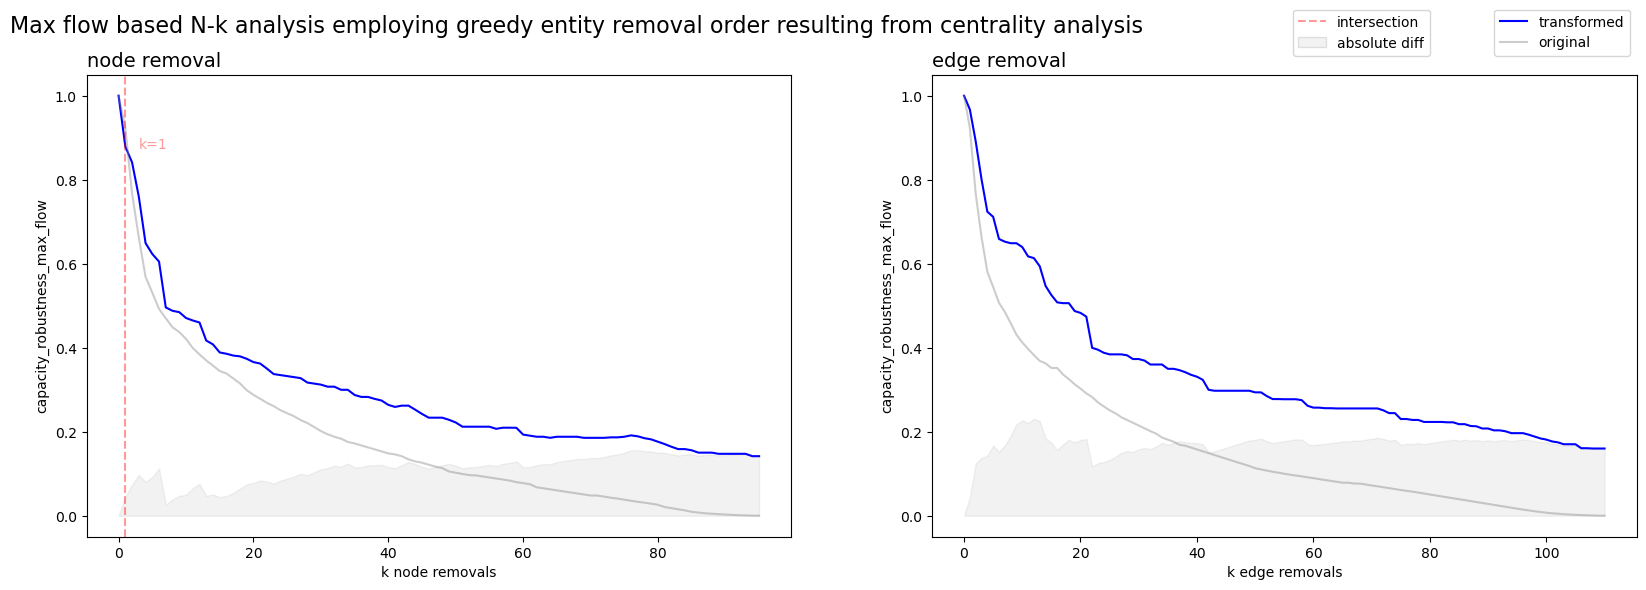

In [13]:
fig = utils.plot_transform_analysis([centrality_greedily_removed_nodes_max_flow_df, centrality_greedily_removed_edges_max_flow_df], [max_flow_greedy_node_removal_df, max_flow_greedy_edge_removal_df], 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/max_flow_employing_centrality_removal_order.png')

In [14]:
utils.common_entities(centrality_greedily_removed_nodes_max_flow_df, max_flow_greedy_node_removal_df)

20 common entity removals
95 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 918.0
Variance of index differences for random (averaged) node removal: 10624.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
0,INET_N_1545,4,3,1
1,INET_N_72,8,9,1
12,INET_N_1219,3,4,1
17,INET_N_314,13,15,2
7,INET_N_272,22,16,6
15,INET_N_966,29,18,11
18,INET_N_999,61,72,11
8,N_kremenchuk,20,31,11
9,INET_N_519,30,45,15
4,NO_N_32,15,34,19


In [15]:
utils.common_entities(centrality_greedily_removed_edges_max_flow_df, max_flow_greedy_edge_removal_df)

15 common entity removals
110 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 1471.0
Variance of index differences for random (averaged) edge removal: 9283.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
1,"(INET_N_1219, INET_N_870)",2,4,2
3,"(INET_N_1551, INET_N_72)",23,20,3
11,"(NO_N_4, NO_N_5)",4,1,3
2,"(INET_N_295, INET_N_992)",15,7,8
0,"(INET_N_1389, INET_N_1573)",19,10,9
13,"(INET_N_301, INET_N_1630)",24,34,10
7,"(INET_N_151, INET_N_1545)",16,3,13
10,"(INET_N_435, INET_N_889)",38,23,15
6,"(INET_N_416, INET_N_138)",30,49,19
4,"(NO_N_13, NO_N_12)",53,25,28


### Centrality based N-k analysis employing greedy entity removal order resulting from max flow analysis

In [16]:
# max_flow_greedily_removed_nodes_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
# max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/iggin/max_flow_greedily_removed_nodes_centrality_df.pkl')

In [17]:
# max_flow_greedily_removed_edges_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
# max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df = pd.read_pickle('results/comparison/iggin/max_flow_greedily_removed_edges_centrality_df.pkl')

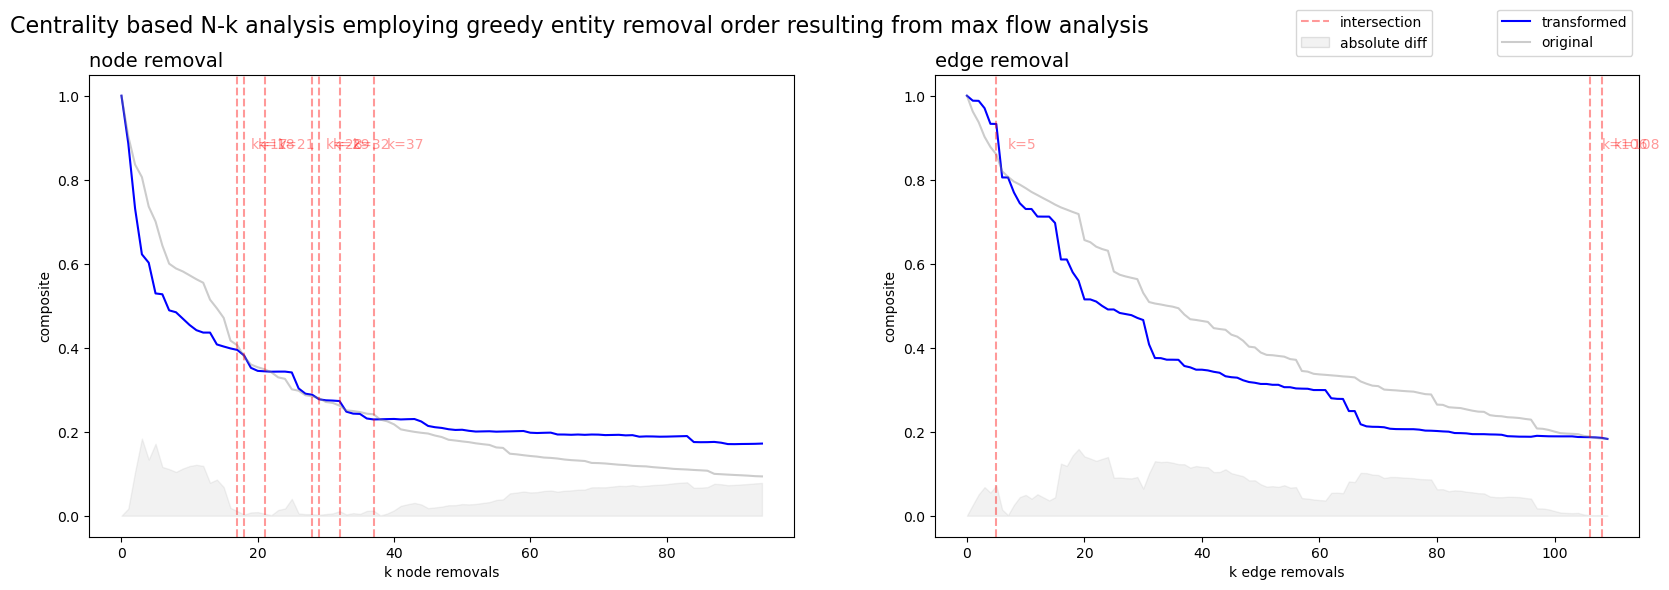

In [18]:
fig = utils.plot_transform_analysis([max_flow_greedily_removed_nodes_centrality_df, max_flow_greedily_removed_edges_centrality_df], [centrality_greedy_node_removal_df, centrality_greedy_edge_removal_df], 'composite')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/centrality_employing_max_flow_removal_order.png')

In [19]:
utils.common_entities(max_flow_greedily_removed_nodes_centrality_df, centrality_greedy_node_removal_df)

20 common entity removals
400 greedy entity removals before 'greedy' reached 0 (limiting metric)

Variance of index differences of common entities: 916.0
Variance of index differences for random (averaged) node removal: 10207.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
17,INET_N_314,14,14,0
1,INET_N_72,8,9,1
12,INET_N_1219,3,4,1
0,INET_N_1545,2,5,3
7,INET_N_272,15,23,8
18,INET_N_999,71,62,9
8,N_kremenchuk,30,21,9
15,INET_N_966,17,30,13
9,INET_N_519,44,31,13
4,NO_N_32,33,16,17


In [20]:
utils.common_entities(max_flow_greedily_removed_edges_centrality_df, centrality_greedy_edge_removal_df)

18 common entity removals
400 greedy entity removals before 'greedy' reached 0 (limiting metric)

Variance of index differences of common entities: 1764.0
Variance of index differences for random (averaged) edge removal: 9210.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
16,"(INET_N_394, INET_N_805)",108,108,0
8,"(INET_N_151, INET_N_1545)",20,15,5
7,"(INET_N_1113, INET_N_698)",3,9,6
13,"(NO_N_4, NO_N_5)",19,5,14
15,"(INET_N_301, INET_N_1630)",37,22,15
4,"(INET_N_1620, INET_N_1637)",16,1,15
11,"(INET_N_435, INET_N_889)",10,36,26
10,"(INET_N_577, INET_N_157)",57,83,26
0,"(INET_N_1389, INET_N_1573)",49,17,32
17,"(INET_N_1000, INET_N_279)",22,54,32
